In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Decision Tree

In [2]:
data=pd.read_csv("car_evaluation.csv")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
col_names = ["buying","maint","doors","persons","lug_boot","safety","class"]

data.columns=col_names
data


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
data[["safety", "class"]][data["safety"] == "low"].value_counts()

safety  class
low     unacc    575
Name: count, dtype: int64

In [5]:
data[["safety", "persons", "class"]][data["safety"] != "low"][data["persons"] == "2"].value_counts()

/var/folders/7r/bzr23rzj5w3csdj3srr2c_100000gn/T/ipykernel_1465/3847302726.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[["safety", "persons", "class"]][data["safety"] != "low"][data["persons"] == "2"].value_counts()


safety  persons  class
high    2        unacc    192
med     2        unacc    192
Name: count, dtype: int64

In [6]:
data[["safety", "persons", "class", "lug_boot"]][data["safety"] != "low"][data["persons"] == "more"][data["lug_boot"] == "small"] .value_counts()

/var/folders/7r/bzr23rzj5w3csdj3srr2c_100000gn/T/ipykernel_1465/671716711.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[["safety", "persons", "class", "lug_boot"]][data["safety"] != "low"][data["persons"] == "more"][data["lug_boot"] == "small"] .value_counts()
/var/folders/7r/bzr23rzj5w3csdj3srr2c_100000gn/T/ipykernel_1465/671716711.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[["safety", "persons", "class", "lug_boot"]][data["safety"] != "low"][data["persons"] == "more"][data["lug_boot"] == "small"] .value_counts()


safety  persons  class  lug_boot
med     more     unacc  small       49
high    more     acc    small       30
                 unacc  small       25
med     more     acc    small       15
high    more     good   small        9
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
data["buying"].value_counts()

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [9]:
for i in col_names:
    print(data[i].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
category_order = [
    ['low','med','high','vhigh'],
    ['low','med','high','vhigh'],
    ['2','3','4','5more'],
    ['2','4','more'],
    ['small','med','big'],
    ['low','med','high'],
    ['unacc','acc','good','vgood']
]

ordinalEN = preprocessing.OrdinalEncoder(categories=category_order)


data = ordinalEN.fit_transform(data)

data = pd.DataFrame(data)

data.columns=col_names

data

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,0.0,1.0,0.0
1,3.0,3.0,0.0,0.0,0.0,2.0,0.0
2,3.0,3.0,0.0,0.0,1.0,0.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...
1722,0.0,0.0,3.0,2.0,1.0,1.0,2.0
1723,0.0,0.0,3.0,2.0,1.0,2.0,3.0
1724,0.0,0.0,3.0,2.0,2.0,0.0,0.0
1725,0.0,0.0,3.0,2.0,2.0,1.0,2.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   buying    1727 non-null   float64
 1   maint     1727 non-null   float64
 2   doors     1727 non-null   float64
 3   persons   1727 non-null   float64
 4   lug_boot  1727 non-null   float64
 5   safety    1727 non-null   float64
 6   class     1727 non-null   float64
dtypes: float64(7)
memory usage: 94.6 KB


In [12]:
x=data.drop("class",axis=1)
y=data["class"]

In [13]:
x_train , x_test , y_train, y_test = train_test_split(x , y , test_size=0.2)
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((1381, 6), (346, 6), (1381,), (346,))

In [14]:
myModel = DecisionTreeClassifier(criterion="gini")

myModel.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
import pickle
with open('model_car.pkl', 'wb') as f:
    pickle.dump(myModel, f)

In [16]:
y_pred=myModel.predict(x_test)
y_pred

array([3., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 2., 0., 2., 3., 0., 0., 0., 0., 0., 1.,
       0., 3., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 3., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 3., 0., 1.,
       0., 0., 1., 0., 2., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 3., 1.,
       0., 0., 3., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0., 3., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 2., 3., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1.

In [17]:
metrics.accuracy_score(y_pred,y_test)*100

98.55491329479769

In [18]:
myModel2 = DecisionTreeClassifier(criterion="entropy")

myModel2.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred2=myModel.predict(x_test)
y_pred2

array([3., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 2., 0., 2., 3., 0., 0., 0., 0., 0., 1.,
       0., 3., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 3., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 3., 0., 1.,
       0., 0., 1., 0., 2., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 3., 1.,
       0., 0., 3., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0., 3., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 2., 3., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1.

In [20]:
metrics.accuracy_score(y_pred2,y_test)*100

98.55491329479769

[Text(0.6308333333333334, 0.9615384615384616, 'x[5] <= 0.5\ngini = 0.454\nsamples = 1381\nvalue = [973, 299, 55, 54]'),
 Text(0.6175, 0.8846153846153846, 'gini = 0.0\nsamples = 463\nvalue = [463, 0, 0, 0]'),
 Text(0.6241666666666668, 0.9230769230769231, 'True  '),
 Text(0.6441666666666667, 0.8846153846153846, 'x[3] <= 0.5\ngini = 0.578\nsamples = 918\nvalue = [510, 299, 55, 54]'),
 Text(0.6375, 0.9230769230769231, '  False'),
 Text(0.6308333333333334, 0.8076923076923077, 'gini = 0.0\nsamples = 309\nvalue = [309, 0, 0, 0]'),
 Text(0.6575, 0.8076923076923077, 'x[0] <= 1.5\ngini = 0.634\nsamples = 609\nvalue = [201, 299, 55, 54]'),
 Text(0.4216666666666667, 0.7307692307692307, 'x[1] <= 1.5\ngini = 0.646\nsamples = 308\nvalue = [37, 162, 55, 54]'),
 Text(0.20666666666666667, 0.6538461538461539, 'x[5] <= 1.5\ngini = 0.688\nsamples = 157\nvalue = [6, 52, 55, 44]'),
 Text(0.08, 0.5769230769230769, 'x[4] <= 0.5\ngini = 0.524\nsamples = 79\nvalue = [3, 44, 32, 0]'),
 Text(0.04, 0.5, 'x[2] <= 0.

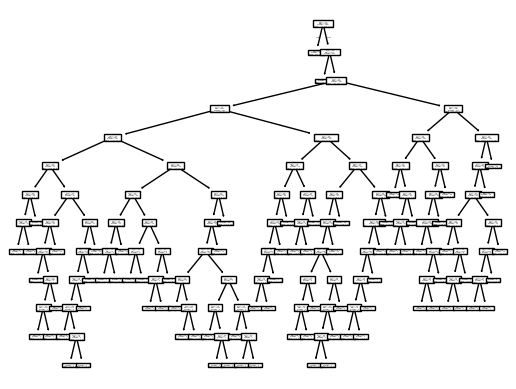

In [21]:
tree.plot_tree(myModel.fit(x_train,y_train))

[Text(0.6224264705882353, 0.9615384615384616, 'x[5] <= 0.5\nentropy = 1.202\nsamples = 1381\nvalue = [973, 299, 55, 54]'),
 Text(0.6106617647058824, 0.8846153846153846, 'entropy = 0.0\nsamples = 463\nvalue = [463, 0, 0, 0]'),
 Text(0.6165441176470589, 0.9230769230769231, 'True  '),
 Text(0.6341911764705882, 0.8846153846153846, 'x[3] <= 0.5\nentropy = 1.482\nsamples = 918\nvalue = [510, 299, 55, 54]'),
 Text(0.6283088235294118, 0.9230769230769231, '  False'),
 Text(0.6224264705882353, 0.8076923076923077, 'entropy = 0.0\nsamples = 309\nvalue = [309, 0, 0, 0]'),
 Text(0.6459558823529412, 0.8076923076923077, 'x[0] <= 1.5\nentropy = 1.655\nsamples = 609\nvalue = [201, 299, 55, 54]'),
 Text(0.4036764705882353, 0.7307692307692307, 'x[1] <= 1.5\nentropy = 1.739\nsamples = 308\nvalue = [37, 162, 55, 54]'),
 Text(0.18235294117647058, 0.6538461538461539, 'x[5] <= 1.5\nentropy = 1.752\nsamples = 157\nvalue = [6, 52, 55, 44]'),
 Text(0.07058823529411765, 0.5769230769230769, 'x[4] <= 0.5\nentropy = 

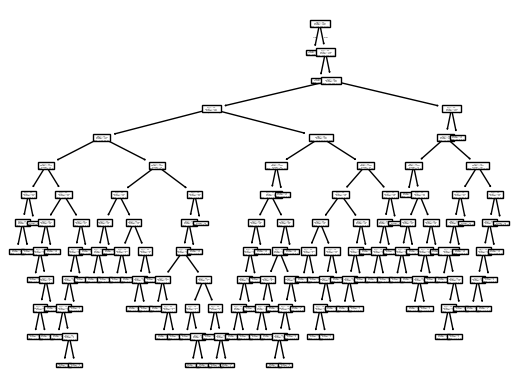

In [22]:
tree.plot_tree(myModel2.fit(x_train,y_train))

# Random Forest

In [23]:
RFmodel = ensemble.RandomForestClassifier()
RFmodel.fit(x_train,y_train)
javab1=RFmodel.predict(x_test)

NameError: name 'ensemble' is not defined

In [ ]:
metrics.accuracy_score(javab1,y_test)*100

98.26589595375722

In [ ]:
javab2=RFmodel.predict(x_train)

In [ ]:
print(metrics.accuracy_score(javab1,y_test)*100)
print(metrics.accuracy_score(javab2,y_train)*100)

98.84393063583815
100.0
